In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [2]:
#Let's create a dataframe to work with
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns = ['One','Two','Three'])

#Show
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [3]:
#Let's see the sum() method in action
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [4]:
#Let's see the sum() method in action
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [5]:
#Can also grab min and max values of dataframe
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [6]:
#As well as there index
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [7]:
#Can also do an accumulation sum
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [8]:
#Can also do an accumulation sum
dframe1.cumsum(axis=1)

,One,Two,Three
A,1.0,3.0,NaN
B,NaN,3.0,7.0


In [9]:
#A very useful feature is describe, which provides summary statistics
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [11]:
#Now lets check correlation and covariance on some stock prices!

#Pandas can get info off the web
from pandas_datareader import data

#Set datetime for date input
import datetime

#Get the closing prices

prices = data.get_data_yahoo(['CVX','XOM','BP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Adj Close']
#Show preview
prices.head()

Symbols,CVX,XOM,BP
Date,,,
2010-01-04,47.631680,42.336414,30.011425
2010-01-05,47.969086,42.501698,30.224522
2010-01-06,47.975101,42.869053,30.381811
2010-01-07,47.794327,42.734360,30.371664
2010-01-08,47.878700,42.562923,30.442694


In [12]:
#Lets get the return
rets = prices.pct_change()

In [13]:
rets

Symbols,CVX,XOM,BP
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.007084,0.003904,0.007101
2010-01-06,0.000125,0.008643,0.005204
2010-01-07,-0.003768,-0.003142,-0.000334
2010-01-08,0.001765,-0.004012,0.002339
...,...,...,...
2012-12-24,-0.009844,-0.003554,-0.009496
2012-12-26,-0.001565,0.001726,-0.000959
2012-12-27,0.000554,-0.002412,-0.001440


In [14]:
#Get the correlation of the stocks
corr = rets.corr

In [15]:
corr

<bound method DataFrame.corr of Symbols          CVX       XOM        BP
Date                                    
2010-01-04       NaN       NaN       NaN
2010-01-05  0.007084  0.003904  0.007101
2010-01-06  0.000125  0.008643  0.005204
2010-01-07 -0.003768 -0.003142 -0.000334
2010-01-08  0.001765 -0.004012  0.002339
...              ...       ...       ...
2012-12-24 -0.009844 -0.003554 -0.009496
2012-12-26 -0.001565  0.001726 -0.000959
2012-12-27  0.000554 -0.002412 -0.001440
2012-12-28 -0.019075 -0.020263 -0.009611
2012-12-31  0.015876  0.017039  0.010189

[754 rows x 3 columns]>

<AxesSubplot:xlabel='Date'>

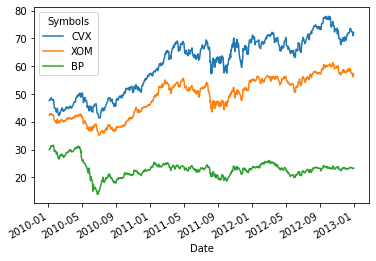

In [16]:
#Lets see the prices over time to get a very rough idea of the correlation between the stock prices
prices.plot()

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

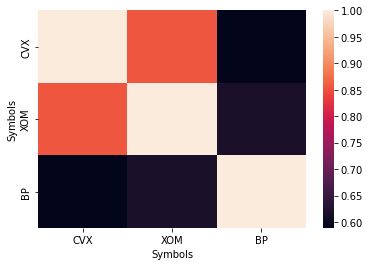

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#As expected pretty strong correlations with eachother
sns.heatmap(rets.corr())

In [18]:
# We can also check for unique values and their counts 

#For example
ser1 = Series(['w','w','x', 'y', 'z' ,'w' ,'w' ,'x' ,'x' ,'y' ,'a' ,'z' ])

#Show
ser1

0     w
1     w
2     x
3     y
4     z
5     w
6     w
7     x
8     x
9     y
10    a
11    z
dtype: object

In [19]:
#Grab the unique values
ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [20]:
#Now get the count of the unique values
ser1.value_counts()

w    4
x    3
y    2
z    2
a    1
dtype: int64

In [21]:
#Now we'll learn how to deal with missing data, a very common task when analyzing datasets!

data = Series(['one','two', np.nan, 'four'])

In [22]:
#Find the missing values
data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [23]:
#We can simply drop the NAN 
data.dropna()

0     one
1     two
3    four
dtype: object

In [24]:
# In a DataFrame we need to be a little more careful!

dframe = DataFrame([[1,2,3],[np.nan,5,6],[7,np.nan,9],[np.nan,np.nan,np.nan]])

In [25]:
clean_dframe = dframe.dropna()

In [26]:

#Show
clean_dframe

,0,1,2
0,1.0,2.0,3.0


In [27]:
#We can also specify to only drop rows that are complete missing all data
dframe.dropna(how='all')

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0


In [28]:
#We can also threshold teh missing data as well

#For example if we only want rows with at least 3 data points
dframe2 = DataFrame([[1,2,3,np.nan],[2,np.nan,5,6],[np.nan,7,np.nan,9],[1,np.nan,np.nan,np.nan]])

#Show
dframe2

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


In [29]:
#Droppin any rows tht dont have at least 2 data points
dframe2.dropna(thresh=2)

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0


In [30]:
#Dropiing rows without at least 3 data points
dframe2.dropna(thresh=3)

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0


In [31]:
#We can also fill any NAN
dframe2.fillna(1)

,0,1,2,3
0,1.0,2.0,3.0,1.0
1,2.0,1.0,5.0,6.0
2,1.0,7.0,1.0,9.0
3,1.0,1.0,1.0,1.0


In [32]:
#Can also fill in diff values for diff columns
dframe2.fillna({0:0,1:1,2:2,3:3})

,0,1,2,3
0,1.0,2.0,3.0,3.0
1,2.0,1.0,5.0,6.0
2,0.0,7.0,2.0,9.0
3,1.0,1.0,2.0,3.0


In [33]:
#Note that we still have access to the original dframe
dframe2

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


In [34]:
#If we want to modify the exsisting object, use inplace
dframe2.fillna(0,inplace=True)

In [35]:
#Now let's see the dframe
dframe2

,0,1,2,3
0,1.0,2.0,3.0,0.0
1,2.0,0.0,5.0,6.0
2,0.0,7.0,0.0,9.0
3,1.0,0.0,0.0,0.0


In [37]:
from numpy.random import randn

In [36]:

#Now we'll learn about Index Hierarchy

#pandas allows you to have multiple index levels, which is very clear with this example:

ser = Series(np.random.randn(6),index=[[1,1,1,2,2,2],['a','b','c','a','b','c']])

In [38]:
#Show Series with multiple index levels
ser

1  a    1.121568
   b    1.252389
   c   -0.011447
2  a   -0.525850
   b    0.467914
   c    0.901341
dtype: float64

In [39]:
# We can check the multiple levels
ser.index

MultiIndex([(1, 'a'),
            (1, 'b'),
            (1, 'c'),
            (2, 'a'),
            (2, 'b'),
            (2, 'c')],
           )

In [40]:
#Now we can sleect specific subsets
ser[1]

a    1.121568
b    1.252389
c   -0.011447
dtype: float64

In [41]:
# We can also select from an internal index level
ser[:,'a']

1    1.121568
2   -0.525850
dtype: float64

In [42]:
# We can also create Data Frames from Series with multiple levels
dframe = ser.unstack()

#Show
dframe

,a,b,c
1,1.121568,1.252389,-0.011447
2,-0.525850,0.467914,0.901341


In [43]:
#Can also reverse
dframe.unstack()

a  1    1.121568
   2   -0.525850
b  1    1.252389
   2    0.467914
c  1   -0.011447
   2    0.901341
dtype: float64

In [44]:
# We can also apply multiple level indexing to DataFrames
dframe2 = DataFrame(np.arange(16).reshape(4,4),
                    index=[['a','a','b','b'],[1,2,1,2]],
                    columns=[['NY','NY','LA','SF'],['cold','hot','hot','cold']])
                                                   
dframe2          

NY      LA   SF
    cold hot hot cold
a 1    0   1   2    3
  2    4   5   6    7
b 1    8   9  10   11
  2   12  13  14   15

In [45]:
# We can also give these index levels names

#Name the index levels
dframe2.index.names = ['INDEX_1','INDEX_2']

#Name the column levels
dframe2.columns.names = ['Cities','Temp']

dframe2

Cities            NY      LA   SF
Temp            cold hot hot cold
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [46]:
# We can also interchange level orders (note the axis=1 for columns)
dframe2.swaplevel('Cities','Temp',axis=1)

Temp            cold hot     cold
Cities            NY  NY  LA   SF
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [51]:
#We can also sort levels
dframe2.sort_index(level=1)

Cities            NY      LA   SF
Temp            cold hot hot cold
INDEX_1 INDEX_2                  
a       1          0   1   2    3
b       1          8   9  10   11
a       2          4   5   6    7
b       2         12  13  14   15